# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [2]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly

---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


[-6. 11. -6.  1.]


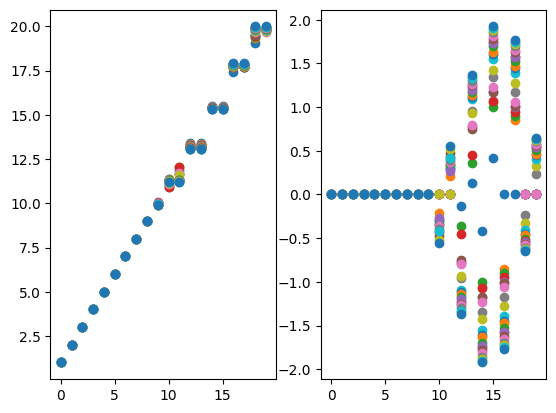

In [3]:
# ===== Twoja implementacja tutaj =====
w1_r = np.arange(1,4,1)
w2_r = np.arange(1,21,1)
an1 = np.polynomial.polynomial.polyfromroots(w1_r)
print(an1)

an2 = np.polynomial.polynomial.polyfromroots(w2_r)
pierwiastki = []
plt.figure
for i in range(21):
    zaburz, pierw = main.roots_20(an2)
    an2 = zaburz
    plt.subplot(1,2,1)
    plt.plot(np.real(pierw), "o")
    plt.subplot(1,2,2)
    plt.plot(np.imag(pierw), "o")

---

### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

[[ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [-1. -1. -1. -1. -1. -1. -1.]]
[ 7.07106781e-01+0.70710678j  7.07106781e-01-0.70710678j
  2.77555756e-16+1.j          2.77555756e-16-1.j
 -1.00000000e+00+0.j         -7.07106781e-01+0.70710678j
 -7.07106781e-01-0.70710678j]
[ 7.07106781e-01+0.70710678j  7.07106781e-01-0.70710678j
  2.77555756e-16+1.j          2.77555756e-16-1.j
 -1.00000000e+00+0.j         -7.07106781e-01+0.70710678j
 -7.07106781e-01-0.70710678j]
[0.97789688-0.00901967j 0.97789688+0.00901967j 0.99051571-0.02210196j
 0.99051571+0.02210196j 1.00901686-0.02256938j 1.00901686+0.02256938j
 1.02257054-0.00948709j 1.02257054+0.00948709j]


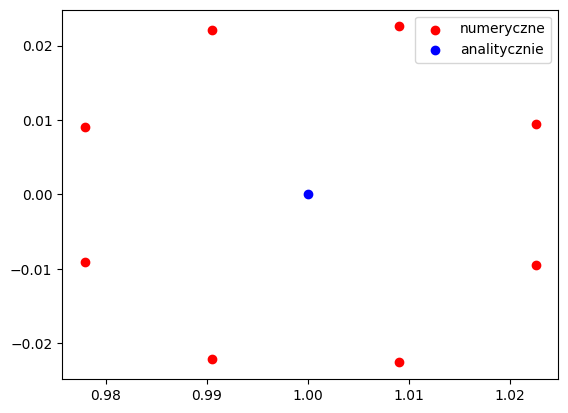

In [4]:
# ===== Twoja implementacja tutaj =====
#Punkt 1
mz_w3 = np.array([1,1,1,1,1,1,1,1])
Fw3 = main.frob_a(mz_w3)
print(Fw3)

#Punkt 2
Ww = np.linalg.eigvals(Fw3)
print(Ww)

T,Z = sp.linalg.schur(Fw3)
Ww2 = np.linalg.eigvals(T)
print(Ww2)

wspolczynniki = np.polynomial.polynomial.polyfromroots(mz_w3)
pierw = np.polynomial.polynomial.polyroots(wspolczynniki)
print(pierw)

#Punkt 3
plt.figure()
plt.scatter(np.real(pierw), np.imag(pierw), color="red", label="numeryczne")
plt.scatter(1,0, color="blue", label="analitycznie")
plt.legend()


---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.

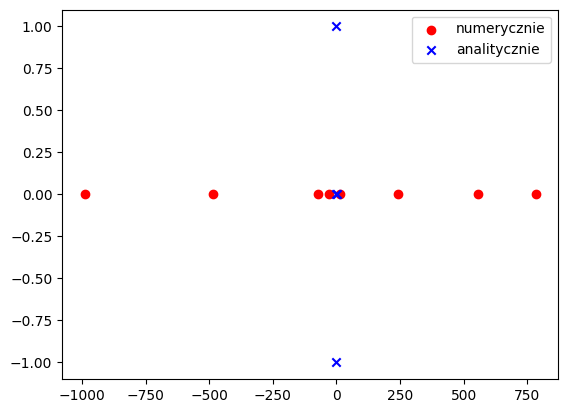

In [8]:
# ===== Twoja implementacja tutaj =====
mz_w4 = np.array([243, -486, 783, -990, 558, -28, -72, 16])
wspol4 = np.polynomial.polynomial.polyfromroots(mz_w4)
pierw4 = np.polynomial.polynomial.polyroots(wspol4)

plt.figure()
plt.scatter(np.real(pierw4), np.imag(pierw4), color="red", label='numerycznie')
roots_analytic = [
    2/3,
    -1/3,               
    1j,
    -1j           
]
ana_real = [np.real(r) for r in roots_analytic]
ana_imag = [np.imag(r) for r in roots_analytic]

plt.scatter(ana_real, ana_imag, color='blue', marker='x', label='analitycznie')
plt.legend()

---

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

In [35]:
# ===== Twoja implementacja tutaj =====
n = np.linspace(1,30,30)
x = 2**n
A1 = np.diag(x[0:10])
A2 = np.diag(x[0:20])
A3 = np.diag(x[0:30])
W_A1 = np.linalg.eigvals(A1)
W_A2 = np.linalg.eigvals(A2)
W_A3 = np.linalg.eigvals(A3)
print(f'Maceirz A1: {A1}')
print(f'Wartości własne macierzy A1: {W_A1}')
print("-------------------------------------------------------")
print(f'Maceirz A2: {A2}')
print(f'Wartości własne macierzy A2: {W_A2}')
print("-------------------------------------------------------")
print(f'Maceirz A3: {A3}')
print(f'Wartości własne macierzy A3: {W_A3}')
print("-------------------------------------------------------")

Maceirz A1: [[   2.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    4.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    8.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.   16.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.   32.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.   64.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.  128.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.  256.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.  512.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0. 1024.]]
Wartości własne macierzy A1: [   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]
-------------------------------------------------------
Maceirz A2: [[2.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+

**Przykładowa forma zestawienia wyników:**
```python
for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")
```

**Rezultat:**
```md
   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_30 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_30 (Frobenius)   0.00e+00           0.00e+00
```

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)